# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# Read the csv data file into a df variable using pandas
df=pd.read_csv('/content/foodhub_order.csv')

In [5]:
# Function that can plot charts given column names and sizes
def plotCharts(columns, fig_width, fig_length, grid_row, grid_col, plot_fn, rotate_ticks=False) :
  plt.figure(figsize=(fig_width, fig_length))
  for i, variable in enumerate(columns):
    plt.subplot(grid_row, grid_col, i + 1)
    plot_fn(variable)
    if rotate_ticks:
      plt.xticks(rotation=90)
    plt.tight_layout()
  plt.show()

In [6]:
# Below head() function lists first 5 rows of the data
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [7]:
# Print the shape which has rows and columns of the data
print('There are', df.shape[0], 'rows and', df.shape[1], 'columns in the foodhub order data')

There are 1898 rows and 9 columns in the foodhub order data


#### Observations:
No. of rows & columns in foodhub order dataset

* Rows = 1898
* Columns = 9

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [8]:
# Below info() method gives datatypes of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

Different datatypes in foothub order dataset

*   Int64
*   Float64
*   Object




### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [9]:
# To check whether there are missing values we can use isnull()
# And to get sum of rows with null value in each column we can do sum()
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [10]:
# To check whether there are duplicate rows we can use duplicated()
df.duplicated().sum()

0

#### Observations:
In foodhub order dataset, there are no missing values in any columns and as well no duplicated rows.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [11]:
# Describe on a dataframe gives us statistical summary of all numerical values in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
Below are statiscs on food preparation time
* Minimum = 20.0
* Average = 27.371970
* Maximum = 35.0

### **Question 5:** How many orders are not rated? [1 mark]

In [12]:
# Get the unique values to see, whats the categorical value for not rated
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [13]:
# Not rated is represented as "Not given" in rating column
# Doing value_counts on categorical value gives the frequency of each value across datasets
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:

Total number of orders rating that are 'Not given' is 736


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [14]:
# Selecting different columns of data and adding their names in list
all_columns = df.columns.tolist()
numeric_columns = df.select_dtypes(include=['number']).drop(['order_id','customer_id'],axis=1).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).drop(['restaurant_name'],axis=1).columns.tolist()

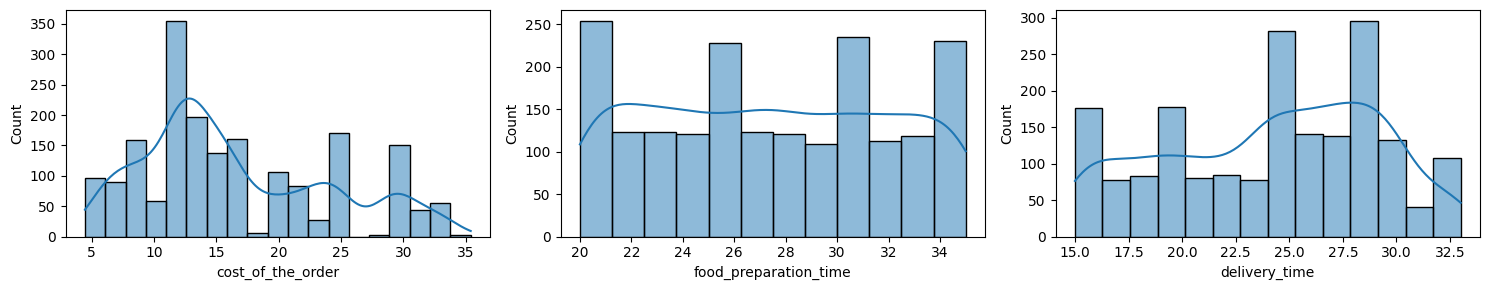

In [15]:
# Plotting histogram with kde on all numeric columns that are meaningful
# This will provide insights on the distribution of the numerical data
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.histplot(data=df, x=variable, kde=True))

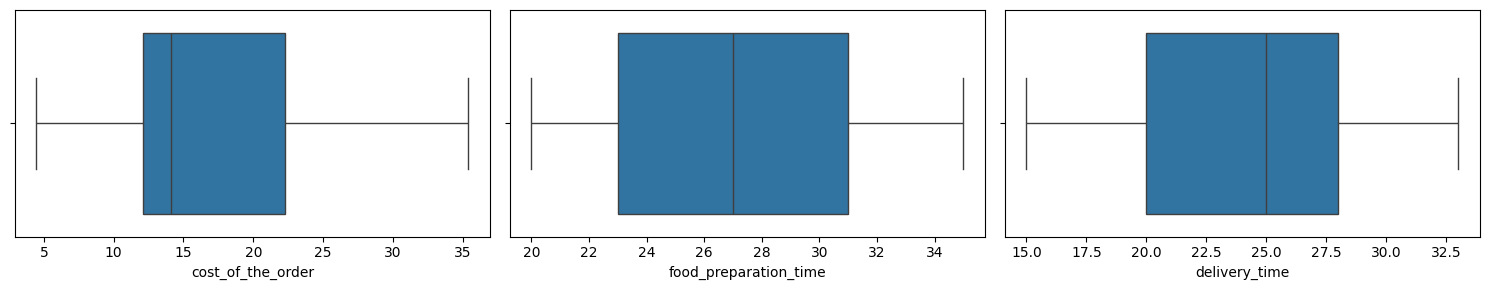

In [16]:
# Plotting boxplot on all numeric columns that are meaningful
# This will provide insights on the distribution, IQR & outliers of the data
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x=variable))

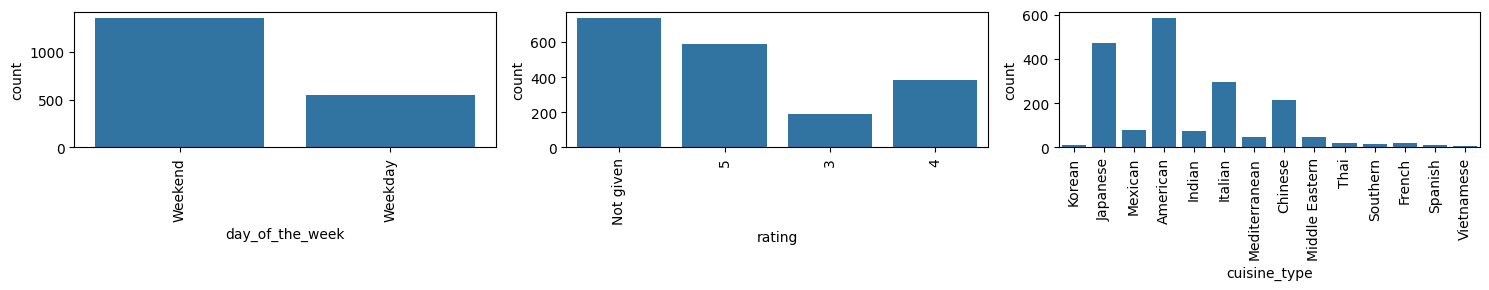

In [17]:
# Plotting countplot on all numeric columns that are meaningful
# This will provide insights on the fequency of the data
plotCharts(['day_of_the_week', 'rating', 'cuisine_type'], 15, 3, 1, 3, lambda variable: sns.countplot(data=df, x=variable), rotate_ticks=True)


#### Observations:

Based on above histograms & boxplots on the important numeric value columns, below are noticed in distribution, outliers, skewness, etc.

**Cost of the order**

*   Mostly of the order costs is between 10 and 15, kde looks like a right skewed but its actually a multimodal distribution as there are 2 peaks on the right side of the chart around 25 and 30.

  
**Food preparation time**

*   Another multimodal distribution with various peeks around 20, 26, 30 & 34mins . Most preparation times are ranging in those values.

**Delivery time**

*   This graph also portraits multimodal distribution given several peeks across. But major delivery time ranging between 25 & 30 mins, but there are also major orders that took 15 & 20 mins.

**Outliers**

*   No outliers on any of the 3 numerical columns analyzed.

---

Based on categorical value columns plotted in countplots, here are the things observed

**Day of the week**
*   Majority of the orders are over the weekend

**Rating**
*   Rating is not provided for majority of the orders
*   Also 5 is the highly provided rating and 3 is lowest

**Cuisine Type**
*   Most popular foods are in order American, Japanese, Italian and Chinese

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [18]:
# Below value_counts (default sord order descending) will give frequency count of each value in the given column
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:

Based on value counts here's the top 5 restaurants in order
*   Shake Shack
*   The Meatball Shop
*   Blue Ribbon Sushi
*   Blue Ribbon Fried Chicken
*   Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [19]:
# First filter for weekend and then get value_counts (default sord order descending) on cuisine_type
# Since the default sord order for value_counts is descending, we get the max value when using head 1
df[df['day_of_the_week']=='Weekend']['cuisine_type'].value_counts().head(1)

American    415
Name: cuisine_type, dtype: int64

#### Observations:

Most popular cuisine type over weekend is American with total orders of 415

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [20]:
# Use conditional filter on dataframe with >20 and get rows
# Divide that by total rows and multiply by 100 to get percentage
gt_order = df[df['cost_of_the_order']>20].shape[0]
lt_order = df[df['cost_of_the_order']<=20].shape[0]
print('Orders cost more than 20 dallars', (gt_order/len(df.index))*100)
print('Orders cost less than or equal to 20 dollars', (lt_order/len(df.index))*100)

Orders cost more than 20 dallars 29.24130663856691
Orders cost less than or equal to 20 dollars 70.75869336143309


#### Observations:

Around 29% of orders cost more than 20 dollars

### **Question 10**: What is the mean order delivery time? [1 mark]

In [21]:
# Pandas mean function can be used to get mean of one column values
df['delivery_time'].mean()

24.161749209694417

#### Observations:

Mean order delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [22]:
# Value counts can help identify the frequency
df['customer_id'].value_counts(ascending=False).head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:

Below are the top 3 customers who are frequent and number of orders placed by them. They are eligible for 20% discount vouchers.

* Total 13 orders placed by customer_id 52832
* Total 10 orders placed by customer_id 47440
* Total 9 orders placed by customer_id 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [23]:
# Selecting different columns of data and adding their names in list
all_columns = df.columns.tolist()
numeric_columns = df.select_dtypes(include=['number']).drop(['order_id','customer_id'],axis=1).columns.tolist()
categorical_columns = df.select_dtypes(exclude=['number']).drop(['restaurant_name'],axis=1).columns.tolist()

<Axes: >

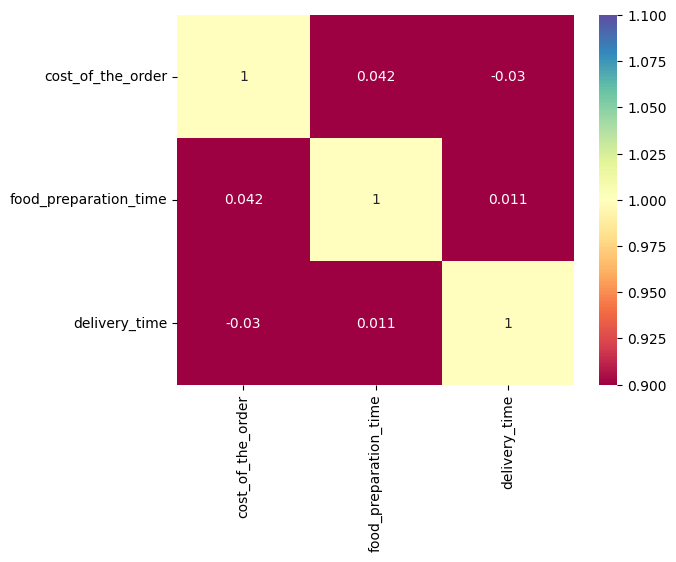

In [24]:
# Plotting heatmap with correlation of all important numeric columns
# This will provide correlation between 2 numeric values
numerical_column_corr = df.select_dtypes(include=['number']).drop(['order_id', 'customer_id'], axis=1).corr()
sns.heatmap(numerical_column_corr, annot=True, cmap='Spectral', vmin=1, vmax=1)

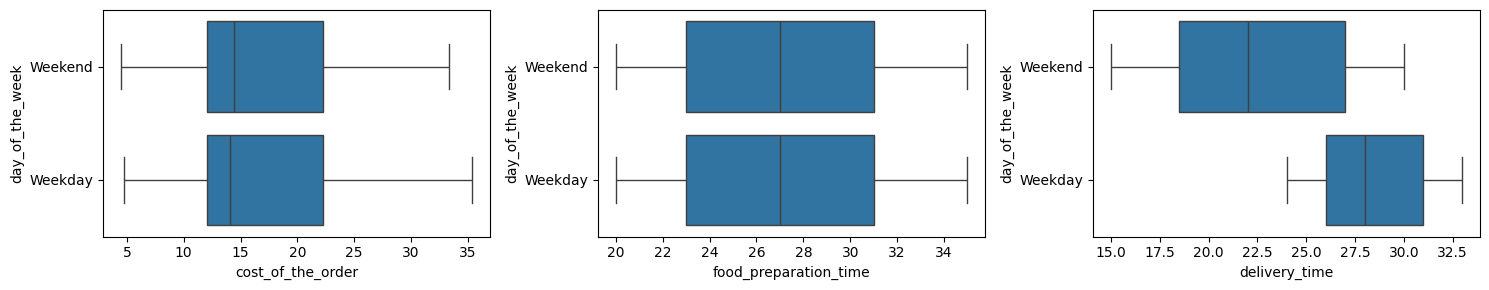

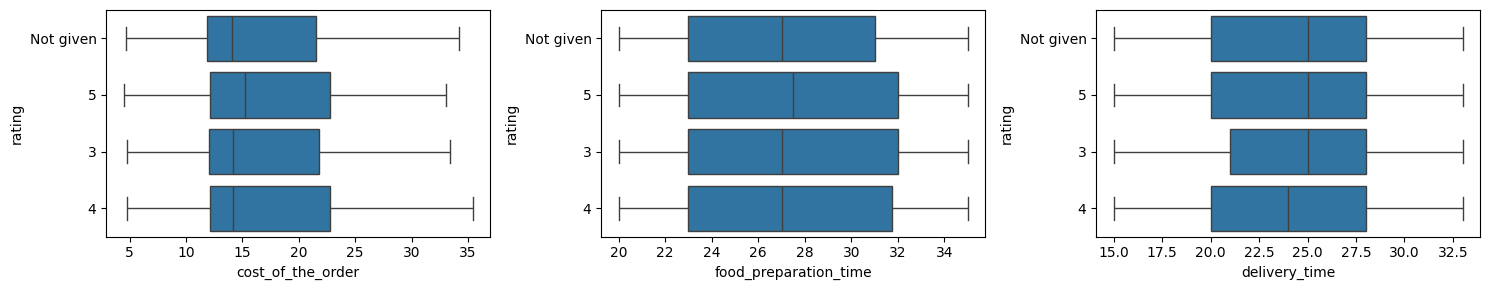

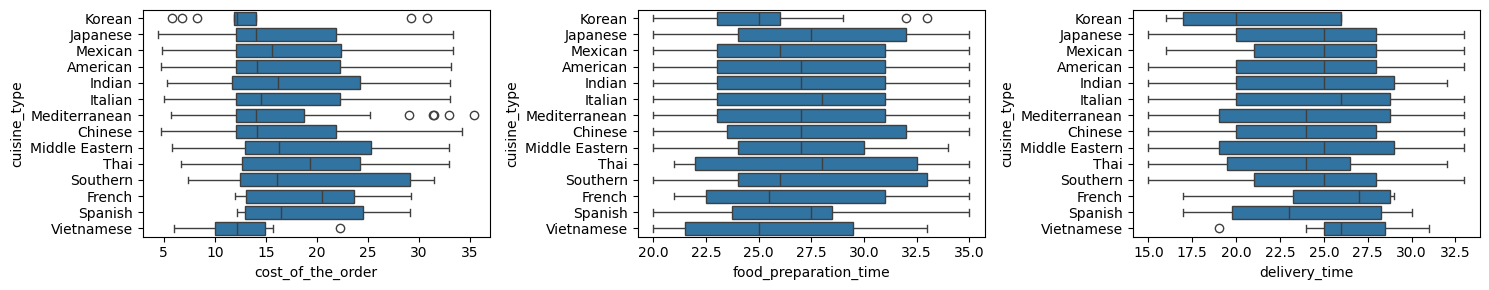

In [25]:
# Plotting boxplot with numeric & categorical columns
# This will provide comparison between 1 numeric and 1 categorical values
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x=variable, y='day_of_the_week'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x=variable, y='rating'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x=variable, y='cuisine_type'))

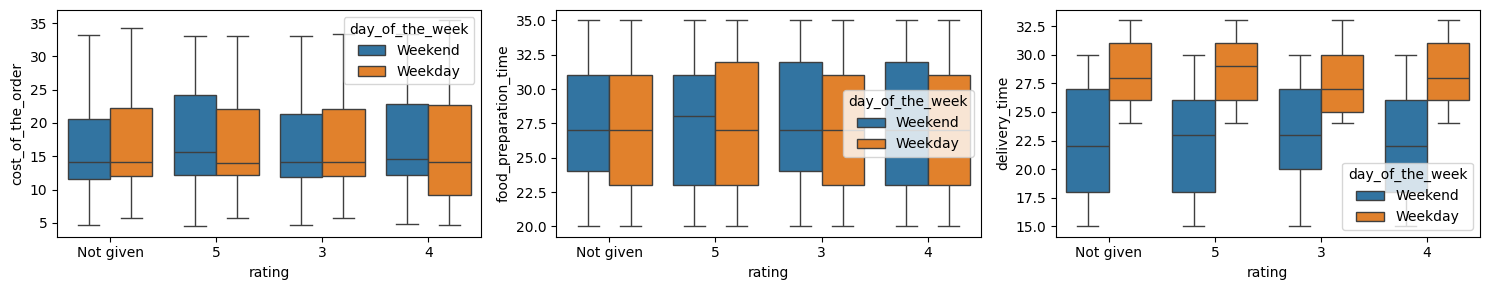

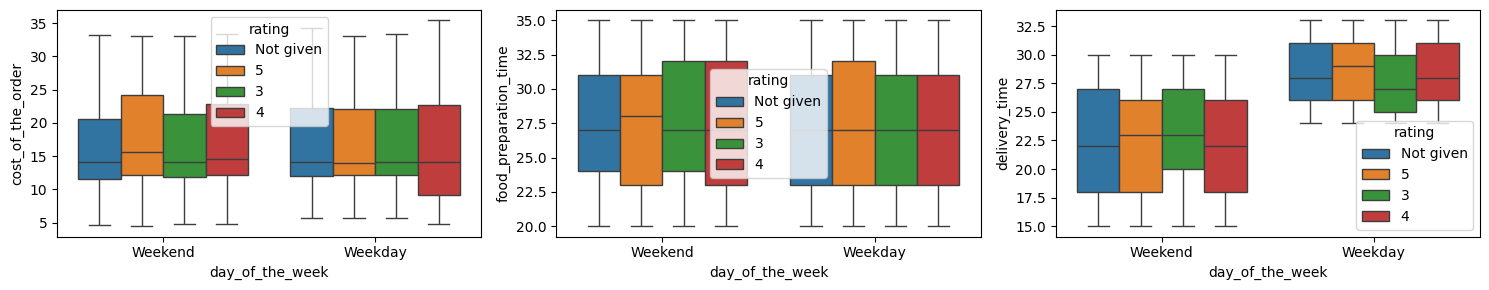

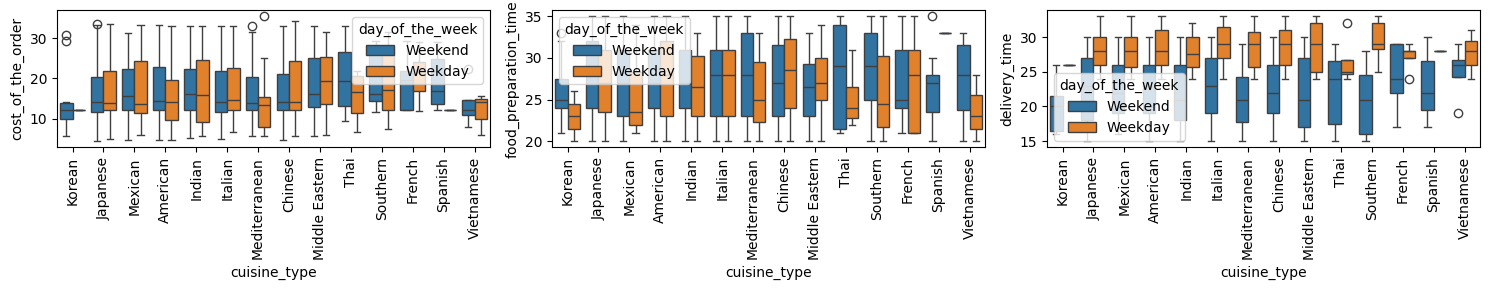

In [26]:
# Plotting boxplot with numeric & categorical columns
# This will provide comparison between 1 numeric and 2 categorical values
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x='rating', y=variable, hue='day_of_the_week'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x='day_of_the_week', y=variable, hue='rating'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.boxplot(data=df, x='cuisine_type', y=variable, hue='day_of_the_week'), True)

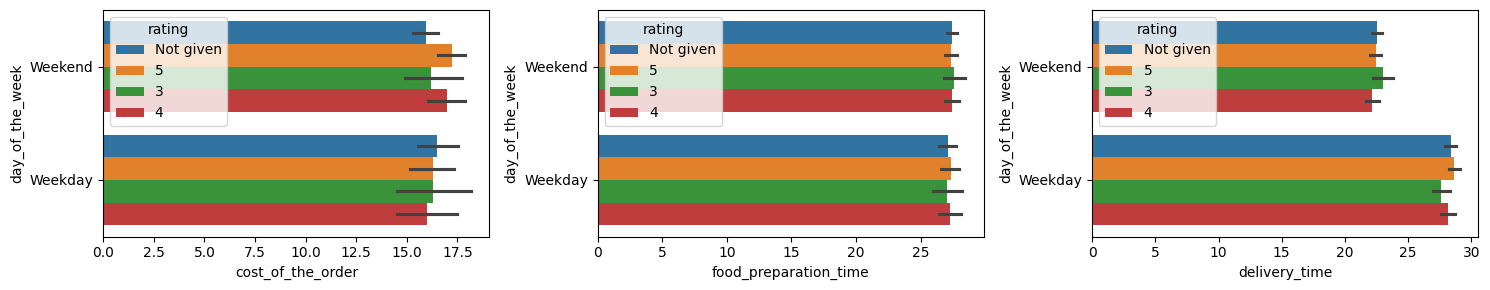

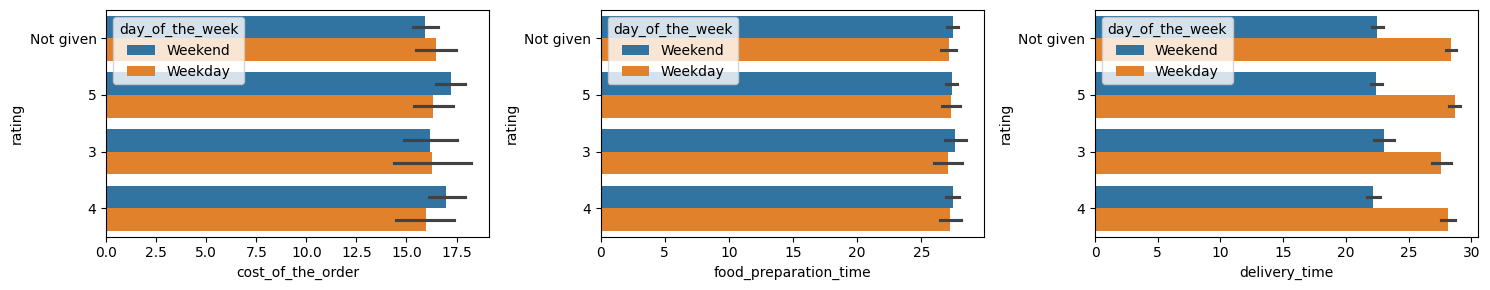

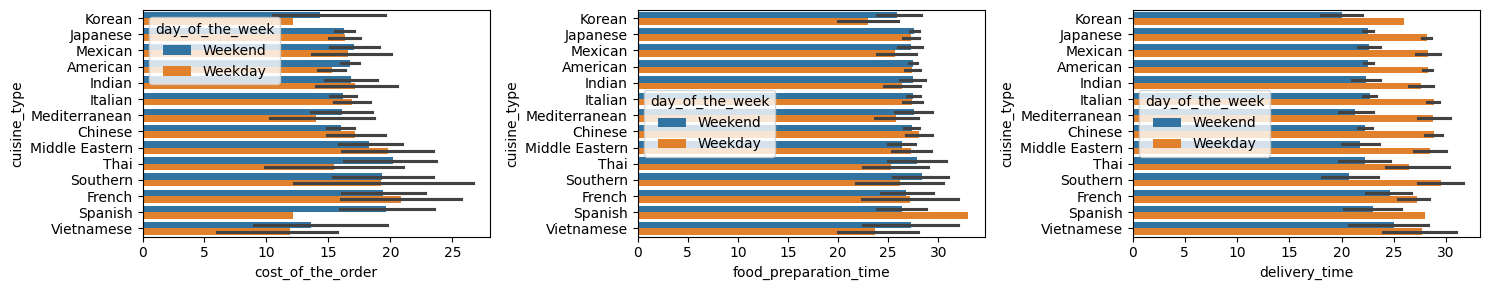

In [27]:
# Plotting barplot with numeric & categorical columns
# This will provide comparison between 1 numeric and 2 categorical values
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='day_of_the_week', hue='rating'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='rating', hue='day_of_the_week'))
plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='cuisine_type', hue='day_of_the_week'))

In [28]:
# Other charts that we can use to compare numerical and categorical columns, but boxplots represents more datapoints with 1 chart, hence these are used as supporting charts for analysis.

# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='day_of_the_week'))
# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.stripplot(data=df, x='day_of_the_week', y=variable))

# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='rating'))
# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.stripplot(data=df, x='rating', y=variable), True)

# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.barplot(data=df, x=variable, y='cuisine_type'))
# plotCharts(numeric_columns, 15, 3, 1, 3, lambda variable: sns.stripplot(data=df, x='cuisine_type', y=variable), True)


#### Observations:
Based on above heatmap, boxplots & barplots on the important numeric value columns & categorical colmns below are noticed in correlation, distribution, outliers, skewness, etc.


**Positive correlations**

- Highest +ve correlation is between cost_of_the_order and food_preparation_time.
- That means, when cost of the order is higher, then food prepartion takes time and when cost is lower, preparation takes less time.
- We can derive 2 reasons with that,
  - Number of quantities in higher cost order could be more, so it takes more time to prepare.
  - Expensive dishes takes more time to prepare and least expensive dishes are quicker to make

- Another +ve correlation is between food_preparation_time and delivery_time.
  - That means, when food preparation takes time the delivery also takes time, which could be because of various reasons like same staff used in delivery
  - Its more tied to business usecase which we dont have enough data, so this can be neglected in our analysis or model building.

**Negative correlations**

- Highest and only -ve correlation is between cost_of_the_order and delivery_time.
- That means, when cost of the order is higher then delivery takes less time and when cost is lower, delivery takes more time.
- We could derive various reasons with that,
  - Expensive orders take higher priority in delivery, so it takes less time.
  - Expensive orders are only in densly populated cities, so delivery places are much closer by to restaurants.
  - Least expensive orders might be in suburbs where cost of living is lower, less tax, etc., and suburbs are much spaced out so delivery addresses could be farther from restaurants.


**Day of the week vs numeric values**
- Day of the week doesnt have any impact on cost of the order, both weekend and weekday the cost remains the same.
- Day of the week doesnt have any impact on food preparation time as well.
- However day of the week have an impact on delivery time especially weekdays, has higher delivery team with 50% of deliveries takes 26 to 30 mins whereas in weekends it takes only between 19 to 26 mins.

**Rating vs numeric values**
- Overall ratings were not impacted by cost, food preparation or delivery time.
- 3 rating is justified when more than 75% of delivery time is over 21 mins.


**Cuisine type vs numeric values**
- On average, French and Thai food are expensive and Vietnamese food is least expensive. Also some mediterranean food are more expensive (outliers).
- On average, Thai, Italian, Spanish and Japanese food preparation time is much higher.
- On average, French, Italian food takes more time to deliver.




### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [29]:
# Calculate the total number of ratings and the average rating for each restaurant filtering out no rating , converting rating column to int
restaurant_ratings = df[df['rating']!='Not given'].astype({'rating': 'int32'}).groupby('restaurant_name').agg({'rating': ['count', 'mean']})
restaurant_ratings.columns = ['total_ratings', 'average_rating']

# Filter out restaurants with more than 50 ratings and an average rating greater than 4
filtered_restaurants = restaurant_ratings[(restaurant_ratings['total_ratings'] > 50) & (restaurant_ratings['average_rating'] > 4)]
print("Restaurants fulfilling criteria to get promotional offer :", filtered_restaurants.index.values)

Restaurants fulfilling criteria to get promotional offer : ['Blue Ribbon Fried Chicken' 'Blue Ribbon Sushi' 'Shake Shack'
 'The Meatball Shop']


#### Observations:

"Not given" is a non-numeric rating value, so we either can fill with NaN or ignore(filter out) those in our calculations as both criteria are based on given ratings.

Both count and average has to be calculated after we group by restaurant_name for rating column. Then those aggregated values should be used in filtering for required criteria.

With that below are the restaurants that has more than 50 rating and an average rating greater than 4

* 'Blue Ribbon Fried Chicken'
* 'Blue Ribbon Sushi'
* 'Shake Shack'
* 'The Meatball Shop'

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [30]:
# Filter out rows that has cost of order greater than 20, then use lambda to apply 25% to each value, then sum it
gt_20_orders = df[(df['cost_of_the_order']>20)]['cost_of_the_order'].apply(lambda x: x*0.25).sum()
print("Revenue for orders greater than 20 dollars", gt_20_orders)

# Filter out rows that has cost of order greater than 5, then use lambda to apply 25% to each value, then sum it
gt_5_orders = df[(df['cost_of_the_order']>5) & (df['cost_of_the_order']<=20)]['cost_of_the_order'].apply(lambda x: x*0.15).sum()
print("Revenue for orders greater than 5 dollars", gt_5_orders)

# Add both revenus to get net revenue
net_revenue =  gt_20_orders + gt_5_orders
print(f"Net revenue: {net_revenue:.2f}")

Revenue for orders greater than 20 dollars 3688.7275
Revenue for orders greater than 5 dollars 2477.5755
Net revenue: 6166.30


#### Observations:

First we need to apply charge percentage on the filtered data based on criteria. Then add all the individual revenues to get net revenue.

Net revenue across all orders given criteria : 6166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [31]:
# Calculate total time and using assign function create a new df with all columns including new total time column
df_totaltime = df.assign(total_time=lambda row: row.food_preparation_time + row.delivery_time)

# Get total orders havint total time greater than 60 and also get total orders to do percentage
total_orders_gt_60 = df_totaltime[df_totaltime['total_time']>60].shape[0]
total_orders = df_totaltime.shape[0]

# Calculate percentage
percent_orders_gt_60 = (total_orders_gt_60/total_orders)*100
print(f"Percentage of orders took more than 60 mins: {percent_orders_gt_60:.2f}")

Percentage of orders took more than 60 mins: 10.54


#### Observations:

Calculated percentage of total orders that took more than 60 mins is around 10.54%

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


<Axes: xlabel='delivery_time', ylabel='day_of_the_week'>

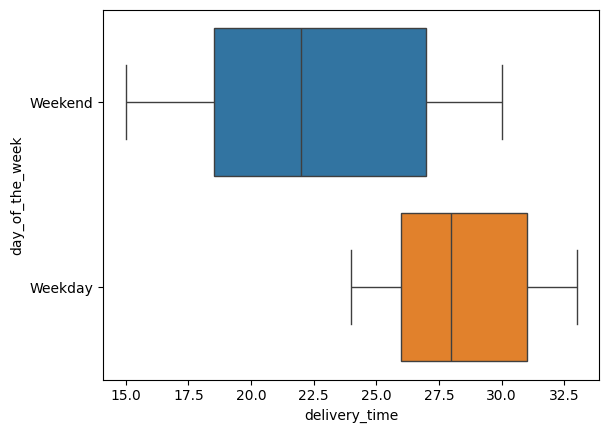

In [32]:
# Calculate and print mean delivery time across day of the week
print(df.groupby(['day_of_the_week'])['delivery_time'].mean())

# Also box plot the same with hue as day of the week to color code
sns.boxplot(data=df, x='delivery_time', y='day_of_the_week', hue='day_of_the_week')

#### Observations:

* Mean delivery time on weekday is greater than weekend
* On the distribution side, weekday deliveries takes 50% more time than weekend deliveries

### Conclusion and Recommendations

Based on above analysis on weekend/weekday delivery times, below are some conclusion and recommendations to the business.

- Identify why the delivery time is higher, is it due to traffic or higher number of orders or labor shortage on weekdays.
   - If its traffic, then we can provide optimized delivery routes for delivery staffs.
   - If its higher number of orders, then we can increase deliver staffs for weekdays.
- Also distribute the order timings in case theres high concentration around certain time, by providing promotions for early orders, etc.

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [33]:
# Calculate count and mean rating grouped by cuisine type.
cuisinetype_ratings = df[df['rating']!='Not given'].astype({'rating': 'int32'}).groupby('cuisine_type').agg({'rating': ['count', 'mean']})
cuisinetype_ratings.columns = ['total_ratings', 'average_rating']
print(cuisinetype_ratings)

                total_ratings  average_rating
cuisine_type                                 
American                  368        4.298913
Chinese                   133        4.338346
French                     10        4.300000
Indian                     50        4.540000
Italian                   172        4.360465
Japanese                  273        4.373626
Korean                      9        4.111111
Mediterranean              32        4.218750
Mexican                    48        4.416667
Middle Eastern             34        4.235294
Southern                   13        4.307692
Spanish                     6        4.833333
Thai                        9        4.666667
Vietnamese                  5        4.000000


In [34]:
# Calculate percentage of ratings missed orders
rating_counts = df['rating'].value_counts()
not_given_count = rating_counts.get('Not given', 0)
percent_missing_ratings = (not_given_count/rating_counts.sum())*100
print(f"Percentage of missing ratings across all orders: {percent_missing_ratings:.2f}")

Percentage of missing ratings across all orders: 38.78


In [35]:
# Count orders by cusine type across day of the week
print(df.groupby(['day_of_the_week'])['cuisine_type'].value_counts(ascending=False))

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

In [36]:
# Find the cuisines which have less than 4 ratings
print(df[df['rating']!='Not given'].astype({'rating': 'int32'}).query('rating<4').groupby(['cuisine_type'])['rating'].value_counts(ascending=False))

cuisine_type    rating
American        3         64
Chinese         3         24
French          3          2
Indian          3          5
Italian         3         28
Japanese        3         40
Korean          3          2
Mediterranean   3          9
Mexican         3          6
Middle Eastern  3          5
Southern        3          1
Vietnamese      3          2
Name: rating, dtype: int64


In [37]:
# Calculate total time and using assign function create a new df with all columns including new total time column
df_totaltime = df.assign(total_time=lambda row: row.food_preparation_time + row.delivery_time)
total_orders = df_totaltime.shape[0]

# Get total orders having total time greater than 50
total_orders_gt_50 = df_totaltime[df_totaltime['total_time']>50].shape[0]
print(f"Percentage of orders took more than 50 mins from order to delivery: {(total_orders_gt_50/total_orders)*100:.2f}")

# Get total orders having delivery time greater than 20
total_orders_delivery = df_totaltime[df_totaltime['delivery_time']>20].shape[0]
print(f"Percentage of orders took more than 20 mins for just delivery: {(total_orders_delivery/total_orders)*100:.2f}")

# Get total orders having food preparation time greater than 20
total_orders_preparation = df_totaltime[df_totaltime['food_preparation_time']>20].shape[0]
print(f"Percentage of orders took more than 20 mins for just preparation: {(total_orders_preparation/total_orders)*100:.2f}")

Percentage of orders took more than 50 mins from order to delivery: 55.95
Percentage of orders took more than 20 mins for just delivery: 72.81
Percentage of orders took more than 20 mins for just preparation: 93.73


### Conclusions:


- Majority of the orders on both weekend and weekday are on only a particular cuisine_type

- Need lot of diversification on the cuisine type.

- Around 39% of orders didnt get ratings provided.

- About 56% of orders took 50 mins are more to prepare and deliver, thats quite a lot of time.

- Around 73% of orders delivery took 20 mins or more.

- Close to 94% of orders took 20 mins or more to prepare.

- Delivery time on weekdays are much higher than on weekends.

### Recommendations:

**Business Strategy - Recommendations**

- Diversify popularity of the cusines
  - Orders and ratings are concentrated on certain type of cuisines like American & Japanese.
  - Promotional offers can be provided for less popular cuisines like Vietnamese, Korean, etc. to drive more traffic.
  - Collabaration with restaurants to provide special/improved menu for Foodhub customers will attract more traffic on less popular cuisine types.
  - Weekday diversification to make people interested in other cuisines will also distribute the traffic and reduce delivery time.

- Recommendation system
  - Create a cuisine recommendation system by analyzing existing data points and orders from the customers.
  - Based on the customer's past orders we can provide suggestions or similar cuisine recommendations to diversify popularity.
  - Based on orders we can derive popular dishes that will help reduce the order time & improve experience for customers.

- Get more customer feedback
  - Ratings can be broken down to multiple categories from quality of food, quality of delivery, packaging and foodhub app experience. In that we will acquire more datapoints to drive the business strategies.
  - Provide more inprompt and follwup notifications on rating feedback from customers through the foodhub mobile app.
  - Share those acquired feedbacks regularly to partner restaurants, so that they know their demand and improve accordingly, it will be a win win situation.
  - We can incentivize customers with promotions for providing ratings.



**Delivery Logistics - Recommendations**

- Reduce delivery time
  - Provide improved maps that will have optimized route during peek time, so that it will reduce delivery time.
  - Ask frequent reviews from delivery staff about the route chose and constantly improve navigations.

- Improve delivery staff
  - Based on data, we need more delivery staffs on weekdays.
  - More training can be provided to them on improving the pickup & delivery time.
  - If vehicles provided by company, analyze whether that can be made cost/energy efficient to drive up overall revenue.


**Partner - Recommendations**

- Reduce food preparation time
  - Share partner's data to them on the preparation time and recommend them to supply more staff during their peak time.
  - Suggest them to improve food preparation/packaging techniques.

- Menu improvements
  - Showcase the customer preferences in the partner restaurant area and based on that suggest them to provide some uniqueness in their dishes to attract more customers.
  - Improve menu items & quality of food prepared in less traffic cuisine restaurants

- Partner profile
  - Provide partners their own profile pages to update order and make it easy for them to constantly update menus.
  - Collect feedback from partners on the orders, revenue, etc.


**Technology - Recommendations**

- Improve navigation on maps for delivery staff.
- Provide weekly notifications based on customer preferences and interests to attract more traffic.
- Provide multiple restaurant order support, so that customer can curate orders from different partners.
- Improve promotional offerings.
- Improve gathering of ratings from customers & partners.

---